Im folgenden soll das Hodgkin-Huxley-Modell implementiert werden. Das einfache Modell zur Simulation Neuronaler Netze beruht auf einem System gekoppelter Differentialgleichungen, die numerisch mit verschiedenen Methoden gelöst werden sollen. 

Hierzu sollen zu Beginn die Gleichungen (11)-(13) aus den Gleichungen (8)-(10) hergeleitet werden:


\begin{align}
\frac{dn}{dt} &= \alpha_n(U) (1 - n) - \beta_n(U) n \tag{8} \\
\frac{dm}{dt} &= \alpha_m(U) (1 - m) - \beta_m(U) m \tag{9} \\
\frac{dh}{dt} &= \alpha_h(U) (1 - h) - \beta_h(U) h \tag{10}
\end{align}

Für die stationären Werte $$ n_{\infty} ,  m_{\infty} , h_{\infty} $$gilt, dass sich die Gate-Variablen nicht mehr ändern, d.h., $$ \frac{dn}{dt} = 0, \frac{dm}{dt} = 0, \frac{dh}{dt} = 0 $$ Diese Bedingungen werden die Gleichungen (8)-(10) eingesetzt:
\begin{align}
0 &= \alpha_n(U) (1 - n_{\infty}) - \beta_n(U) n_{\infty} \\
0 &= \alpha_m(U) (1 - m_{\infty}) - \beta_m(U) m_{\infty} \\
0 &= \alpha_h(U) (1 - h_{\infty}) - \beta_h(U) h_{\infty}
\end{align}

Es folgt umstellen, um $$ n_{\infty} ,  m_{\infty} ,  h_{\infty} $$ auszudrücken:
\begin{align}
n_{\infty} &= \frac{\alpha_n(U)}{\alpha_n(U) + \beta_n(U)} \\
m_{\infty} &= \frac{\alpha_m(U)}{\alpha_m(U) + \beta_m(U)} \\
h_{\infty} &= \frac{\alpha_h(U)}{\alpha_h(U) + \beta_h(U)}
\end{align}

Die Zeitkonstanten $$ \tau_n ,  \tau_m ,  \tau_h $$ sind definiert als:
\begin{align}
\tau_n &= \frac{1}{\alpha_n(U) + \beta_n(U)} \\
\tau_m &= \frac{1}{\alpha_m(U) + \beta_m(U)} \\
\tau_h &= \frac{1}{\alpha_h(U) + \beta_h(U)}
\end{align}

Jetzt setzen wir die Zeitkonstanten in die Gleichungen (8)-(10) ein, um die Form (11)-(13) zu erhalten:
$$
\begin{align*}
\frac{dn}{dt} &= \alpha_n(U) (1 - n) - \beta_n(U) n \\
&= \alpha_n(U) - \alpha_n(U) n - \beta_n(U) n \\
&= \alpha_n(U) - (\alpha_n(U) + \beta_n(U)) n \\
&= (\alpha_n(U) + \beta_n(U)) \left( \frac{\alpha_n(U)}{\alpha_n(U) + \beta_n(U)} - n \right) \\
&= \frac{1}{\tau_n} (n_{\infty} - n)
\end{align*}
$$
$$
\begin{align*}
\frac{dm}{dt} &= \alpha_m(U) (1 - m) - \beta_m(U) m \\
&= \alpha_m(U) - \alpha_m(U) m - \beta_m(U) m \\
&= \alpha_m(U) - (\alpha_m(U) + \beta_m(U)) m \\
&= (\alpha_m(U) + \beta_m(U)) \left( \frac{\alpha_m(U)}{\alpha_m(U) + \beta_m(U)} - m \right) \\
&= \frac{1}{\tau_m} (m_{\infty} - m)
\end{align*}
$$
$$
\begin{align*}
\frac{dh}{dt} &= \alpha_h(U) (1 - h) - \beta_h(U) h \\
&= \alpha_h(U) - \alpha_h(U) h - \beta_h(U) h \\
&= \alpha_h(U) - (\alpha_h(U) + \beta_h(U)) h \\
&= (\alpha_h(U) + \beta_h(U)) \left( \frac{\alpha_h(U)}{\alpha_h(U) + \beta_h(U)} - h \right) \\
&= \frac{1}{\tau_h} (h_{\infty} - h)
\end{align*}
$$

Damit wurde gezeigt, dass die Gleichungen (11) - (13) aus den Gleichungen (8) - (10) folgen.

Um die Hodgkin-Huxley Gleichungen über einen Zeitraum von 50 ms mit verschiedenen Verfahren zu berechnen müssen die gegebenen Parameter in der Klasse HHParameters implementiert werden:


In [36]:
# Die gegebenen Konstanten werden in einer Klasse implementiert

class HHParameters:
    def __init__(self):
        self.C_m = 1.0     # Membran Kapazität, in uF/cm^2
        self.g_Na = 120.0  # Maximale Leitfähigkeit Natrium, in mS/cm^2
        self.g_K = 36.0    # Maximale Leitfähigkeit Kalium, in mS/cm^2
        self.g_L = 0.3     # Maximale Leitfähigkeit Leck, in mS/cm^2
        self.U_Na = 50.0   # Spannung Natrium, in mV
        self.U_K = -77.0   # Spannung Kalium, in mV
        self.U_L = -54.387 # Spannung Leck, in mV
        self.U_pot = -65.0 # äußeres Potenzial, dient als Startwert für die Spannungsvariable beim Lösen

params = HHParameters()

Die Funktionen für alpha und beta werden zur Berechnung der Gating Variablen initialisiert: 

In [37]:

import numpy as np
import matplotlib.pyplot as plt

class HHGatingVariables:
    @staticmethod
    def alpha_n(U):
        return -0.01 * (55 + U) / (np.exp(-(55 + U) / 10) - 1)
    
    @staticmethod
    def beta_n(U):
        return 0.125 * np.exp(-(65 + U) / 80)
    
    @staticmethod
    def alpha_m(U):
        return -0.1 * (40 + U) / (np.exp(-(40 + U) / 10) - 1)
    
    @staticmethod
    def beta_m(U):
        return 4.0 * np.exp(-(65 + U) / 18)
    
    @staticmethod
    def alpha_h(U):
        return 0.07 * np.exp(-(65 + U) / 20)
    
    @staticmethod
    def beta_h(U):
        return 1 / (np.exp(-(35 + U) / 10) + 1)

Die folgende Klasse enthält nun das Hodgkin-Huxley-Modell. Dabei wird auf die zuvor erstellten Klassen zurück gegriffen. Als Startparameter für die Spannung werden -65 mV gewählt, da dies die Spannung für ein geschlossene Membran darstellt. Als Startparameter für n, m und h wählen wir deren Gleichgewichtswerte, die aus der Herleitung zu Beginn berechnet werden können. 

In [38]:
# contains n, m, h and U initial values and the math to compute the derivatives
class HHModel:
    def __init__(self, parameters):
        self.params = parameters
        self.U = self.params.U_pot  # initial membrane potential

        # we start with the gating variables in their equilibrium state:
        self.n = self._n_inf(self.U) 
        self.m = self._m_inf(self.U)
        self.h = self._h_inf(self.U)

    @staticmethod
    def _n_inf(U):
        return HHGatingVariables.alpha_n(U) / (HHGatingVariables.alpha_n(U) + HHGatingVariables.beta_n(U))
    
    @staticmethod
    def _m_inf(U):
        return HHGatingVariables.alpha_m(U) / (HHGatingVariables.alpha_m(U) + HHGatingVariables.beta_m(U))
    
    @staticmethod
    def _h_inf(U):
        return HHGatingVariables.alpha_h(U) / (HHGatingVariables.alpha_h(U) + HHGatingVariables.beta_h(U))

    # stellt das System von DGL dar
    def compute_derivatives(self, U, n, m, h, I_ext):
        dn = HHGatingVariables.alpha_n(U) * (1 - n) - HHGatingVariables.beta_n(U) * n
        dm = HHGatingVariables.alpha_m(U) * (1 - m) - HHGatingVariables.beta_m(U) * m
        dh = HHGatingVariables.alpha_h(U) * (1 - h) - HHGatingVariables.beta_h(U) * h
        
        I_Na = self.params.g_Na * m**3 * h * (U - self.params.U_Na)
        I_K = self.params.g_K * n**4 * (U - self.params.U_K)
        I_L = self.params.g_L * (U - self.params.U_L)
        
        dU = (I_ext - I_Na - I_K - I_L) / self.params.C_m
        
        return np.array([dU, dn, dm, dh])
    
hh_model = HHModel(params)


Als kurzer Zwischenschritt werden nun zur Bestimmung sinnvoller Anfangswerte die Gleichgewichtszustände der Gating Variablen n, m und h bei verschiedenen Spannungen U zwischen -100 mV und 100 mV  geplottet. Da das äußeres Potential von -65 mV eine geschlossenen Membran bedeutet, liegen hier die von uns verwendeten Anfangswerte.

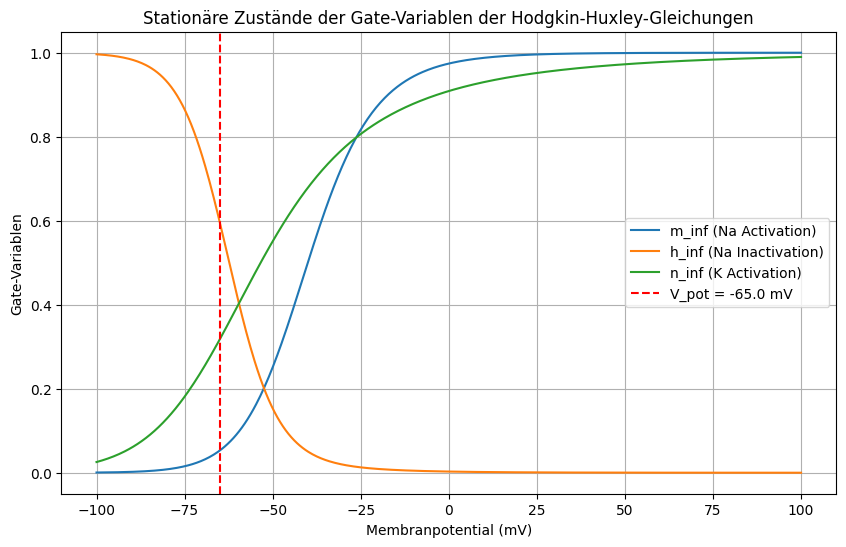

Bei -65 mV ist der Wert von n_inf = 0.3176769140606974
Bei -65 mV ist der Wert von m_inf = 0.05293248525724958
Bei -65 mV ist der Wert von h_inf = 0.5961207535084603


In [39]:
# plots the equilibrium curves of the gating variables against the membrane potential

# Spannungsbereich
U_range = np.linspace(-100, 100, 500)

# Berechnung der stationären Zustände
n_inf = HHModel._n_inf(U_range)
m_inf = HHModel._m_inf(U_range)
h_inf = HHModel._h_inf(U_range)

n_start = HHModel._n_inf(-65)
m_start = HHModel._m_inf(-65)
h_start = HHModel._h_inf(-65)

# Plotten der stationären Zustände der Gate-Variablen gegen Spannung
plt.figure(figsize=(10, 6))
plt.plot(U_range, m_inf, label="m_inf (Na Activation)")
plt.plot(U_range, h_inf, label="h_inf (Na Inactivation)")
plt.plot(U_range, n_inf, label="n_inf (K Activation)")

plt.axvline(hh_model.params.U_pot, color='r', linestyle='--', label=f"V_pot = {hh_model.params.U_pot} mV")

plt.xlabel("Membranpotential (mV)")
plt.ylabel("Gate-Variablen")
plt.title("Stationäre Zustände der Gate-Variablen der Hodgkin-Huxley-Gleichungen")
plt.legend()
plt.grid(True)
plt.show()

print(f"Bei -65 mV ist der Wert von n_inf = {n_start}")
print(f"Bei -65 mV ist der Wert von m_inf = {m_start}")
print(f"Bei -65 mV ist der Wert von h_inf = {h_start}")

Sinnvolle Anfangszustände sind also zum Beispiel gegeben durch die Gleichgewichtszustände bei $$U = V_{pot} = -65 mV$$
und somit für n = 0.318, m = 0.053 und h = 0.596




Nun soll die Implementation des HH-Models weiter gehen. 
Der externe Strom soll als konstante von 5 nA gewählt werden:

In [40]:
# returns the external current for the simulated neuron in nA
def I_ext(t):
    return 5

Um die Wiederholung von dem Setup und dem plotten der Daten zu verhindern, implementieren wir eine Parent Class, von der die 3 verschiedenen Simulationen dann als child classes erben werden. Die child classes implementieren unter der `run` Funktion dann jeweils die verschiedenen Lösungsalgorithmen.

In [41]:
# abstract class for our 3 simulation classes: 
class HHSimulation:
    def __init__(self, hh_model, time, dt, I_ext: callable):
        self.hh_model = hh_model
        self.time = time
        self.dt = dt
        self.I_ext = I_ext 
        self.t_values = np.arange(0, time, dt)
        self.U_values = np.zeros(len(self.t_values))
        self.n_values = np.zeros(len(self.t_values))
        self.m_values = np.zeros(len(self.t_values))
        self.h_values = np.zeros(len(self.t_values))

    # abstract method that will be implemented by the subclasses
    def run(self):
        raise NotImplementedError("subclass has to implement this method")

    def plot(self):
        # Plot der zeitlichen Entwicklung des Membranpotentials und der Gate-Variablen
        plt.figure(figsize=(12, 8))

        # Membranpotential
        plt.subplot(2, 1, 1)
        plt.plot(self.t_values, self.U_values, label="Membranpotential (U)")
        plt.ylabel("Membranpotential (mV)")
        plt.legend()

        # Gate-Variablen
        plt.subplot(2, 1, 2)
        plt.plot(self.t_values, self.n_values, label="n")
        plt.plot(self.t_values, self.m_values, label="m")
        plt.plot(self.t_values, self.h_values, label="h")
        plt.xlabel("Zeit (ms)")
        plt.ylabel("Gate-Variablen")
        plt.legend()

        plt.show()

Jetzt kann mit der ersten Simulation des HH-Models begonnen werden. Wir beginnen mit der Implementation des Euler Verfahrens und greifen dafür auf die in der Klasse HHModel implementierten Methoden und Parameter zurück. Die errechneten Werte für das Membranpotential und die Gating Variablen n, m und h werden mit Schrittweite dt = 0.01 s in Listen zwischengespeichert und anschließend geplottet.

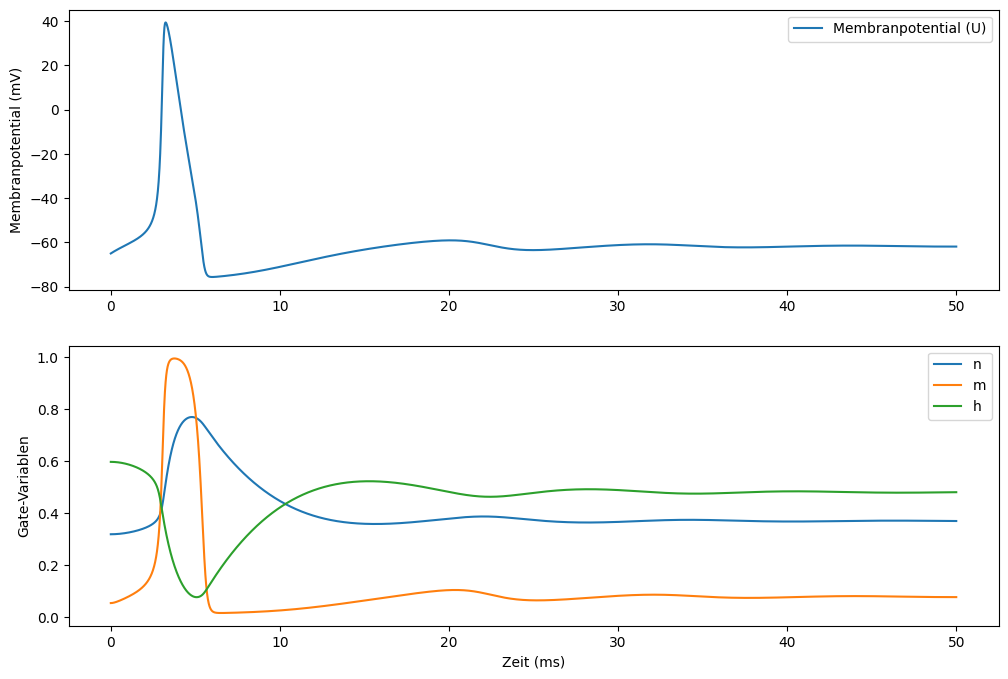

In [42]:
class HHSimulationEuler(HHSimulation):
    def run(self):
        U = self.hh_model.U
        n = self.hh_model.n
        m = self.hh_model.m
        h = self.hh_model.h

        for i, t in enumerate(self.t_values):
            self.U_values[i] = U
            self.n_values[i] = n
            self.m_values[i] = m
            self.h_values[i] = h

            y = [U,n,m,h]
            I_ext = self.I_ext(t)

            dy = self.hh_model.compute_derivatives(*y, I_ext)

            U, n, m, h = y + dy * self.dt

        return self.t_values, self.U_values, self.n_values, self.m_values, self.h_values 

euler_sim = HHSimulationEuler(hh_model, time=50, dt=0.01, I_ext=I_ext)
euler_sim.run()
euler_sim.plot()

Wir starten wie oben erwähnt mit einem Membranpotenzial von -65 mV. Dies gilt als Potenzial für eine geschloßene Membran.
Der Plot macht die Terminologie der Variablen m und h deutlich:
- m gilt als Aktivierungsvariable. Zu Beginn (U = -65 mV) ist m(t=0) nahe 0. Daraus folgt, dass der Strom im Natriumkanal $$ I_{Na} = g_{Na} * m^{3} * h *(U - U_{Na}) \approx 0 $$
Wenn das Membranpotenzial deutlich über das Ruhepotenzial ansteigt, erhöht sich die Gating-Variable m auf ihren neuen Wert m(u). Solange sich h nur leicht ändert, steigt der Natriumstrom und das Gate öffnet sich. Die Variable m „aktiviert“ also den Kanal. Wenn m nach einer Rückkehr der Spannung in den Ruhezustand wieder auf Null abfällt, spricht man von einer „Deaktivierung“.

- die Inaktivierungsvariable h hat zu Beginn einen hohen Wert von ungefähr 0,6.
 Sobald die Spannung einen Wert über 40 mV erreicht, nähert sich h einem Wert nahe 0 an. Daher "inaktiviert" der Natriumkanal bis die Spannung kurz über das Ruhepotenzial von -65 mV schießt und sich dann langsam wieder auf dem Wert -65 mV einpendelt.

- die Variable n für die Aktivierung der Kaliumkanäle scheint antiproporional zur Inaktivierungsvaribalen h des Natrium zu verlaufen

2b.) Als alternative Methode zum Lösen der HH-Gleichungen wird das Runge Kutta Verfahren implementiert. Auch hierfür greifen wir wieder auf die Parameter und Methoden der Klasse HHModel zurück:

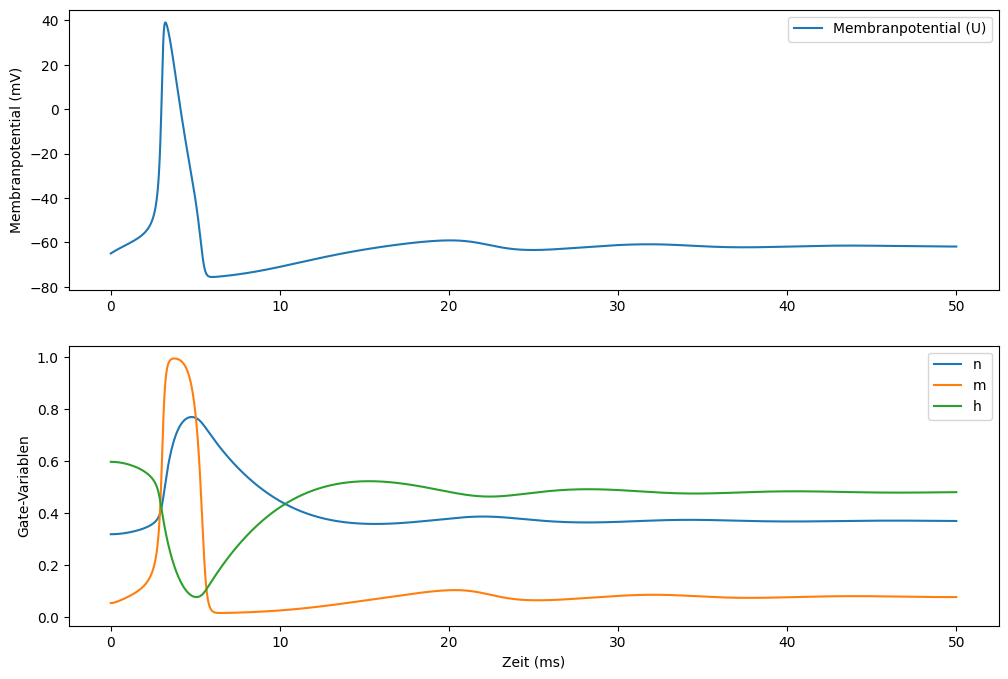

In [43]:
# runs a simulation using the classical Runge-Kutta method to solve the ODE
class HHSimulationClassicalRungeKutta(HHSimulation):

    def run(self):
        U = self.hh_model.U
        n = self.hh_model.n
        m = self.hh_model.m
        h = self.hh_model.h

        for i, t in enumerate(self.t_values):
            self.U_values[i] = U
            self.n_values[i] = n
            self.m_values[i] = m
            self.h_values[i] = h

            y = [U,n,m,h]
            I_ext = self.I_ext(t)

            k1 = self.hh_model.compute_derivatives(*y, I_ext)
            k2 = self.hh_model.compute_derivatives(*(y + k1*self.dt/2), I_ext)
            k3 = self.hh_model.compute_derivatives(*(y + k2*self.dt/2), I_ext)
            k4 = self.hh_model.compute_derivatives(*(y + k3*self.dt), I_ext)

            U, n, m, h = y + (k1 + 2*k2 + 2*k3 + k4)*self.dt/6

        return self.t_values, self.U_values, self.n_values, self.m_values, self.h_values

rk_sim = HHSimulationClassicalRungeKutta(hh_model, time=50, dt=0.01, I_ext=I_ext)
rk_sim.run()
rk_sim.plot()

Hier merkt man schon beim Ausführen sofort, dass die Methode mit dem Eulerverfahren deutlich schneller geht, was allerdings auch nicht verwunderlich ist, da für das Euler-Verfahren nur eine Ableitung bestimmt werden muss. Ein Vergleich der Genauigkeiten der beiden Methoden folgt. Hierfür wird auf die Methode odeint aus dem Scipy Package für Python zurückgegriffen, die Gewöhnliche Differential Gleichnungen schnell und genau lösen soll.

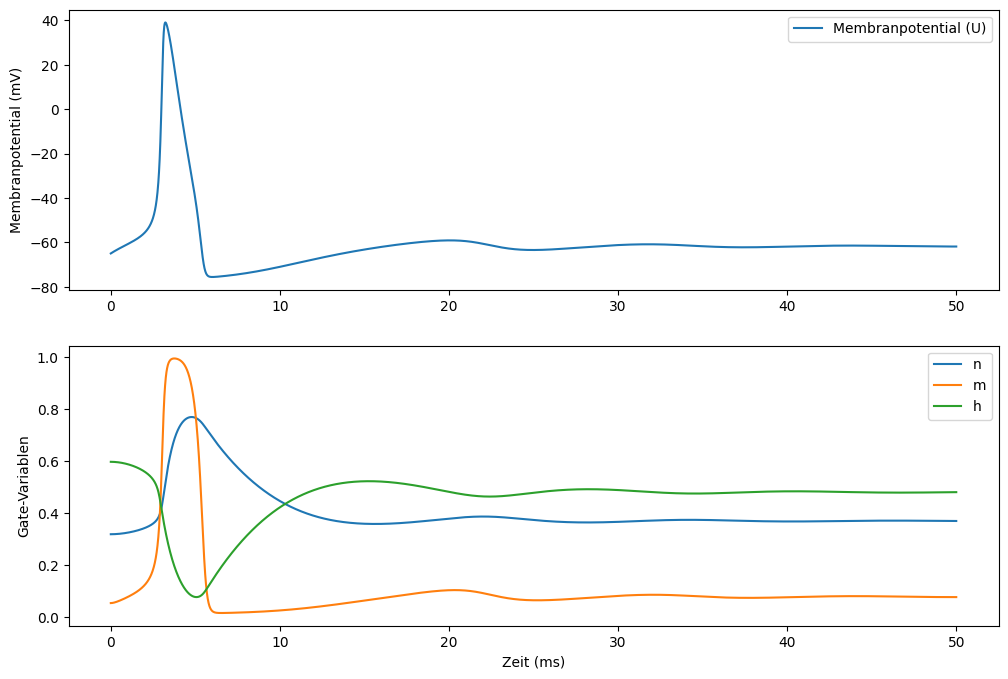

In [44]:
from scipy.integrate import odeint

# runs a simulation using the odeint method to solve the ODE
class HHSimulationOdeint(HHSimulation):

    def run(self):
        y0 = [self.hh_model.U, self.hh_model.n, self.hh_model.m, self.hh_model.h]
        y_list = odeint(self.compute_derivatives_wrapper, y0, self.t_values)

        self.U_values = y_list[:, 0]
        self.n_values = y_list[:, 1]
        self.m_values = y_list[:, 2]
        self.h_values = y_list[:, 3]
        
        return self.t_values, self.U_values, self.n_values, self.m_values, self.h_values

    # wrapper to match odeint´s required call signature, because compute_derivatives does not need t as input
    def compute_derivatives_wrapper(self, y, t):
        return self.hh_model.compute_derivatives(*y, self.I_ext(t))

odeint_sim = HHSimulationOdeint(hh_model, time=50, dt=0.01, I_ext=I_ext)
odeint_sim.run()
odeint_sim.plot()

Ein kurzer Vergleich der Zeit zum Berechnen der Methoden zeigt:

In [45]:
# comparing the time efficiency of the 3 different methods: 
import time

time_period = 30

def time_func(func, *args):
    start = time.perf_counter()
    func(*args)
    end = time.perf_counter ()
    return end - start

dt = 0.01

time_euler = time_func(HHSimulationEuler(hh_model, time_period, dt, I_ext).run)   
time_rk = time_func(HHSimulationClassicalRungeKutta(hh_model, time_period, dt, I_ext).run)
time_odeint = time_func(HHSimulationOdeint(hh_model, time_period, dt, I_ext).run)

print(f"Simulation Parameters: \n\ttime_period: {time_period} ms \n\tdt: {dt} ms")
print(f"Euler: {time_euler} seconds")
print(f"Runge-Kutta: {time_rk} seconds")
print(f"odeint: {time_odeint} seconds")

Simulation Parameters: 
	time_period: 30 ms 
	dt: 0.01 ms
Euler: 0.041928800055757165 seconds
Runge-Kutta: 0.2012351000448689 seconds
odeint: 0.012129499984439462 seconds


Bei einer Berechnung über 30 ms in Schrittweiten von dt = 0,01 ms dauert das Runge-Kutta-Verfahren mit Abstand am längsten. Das Eulerverfahren ist deutlich schneller und odeint fast vier Mal so schnell wie die von uns implementierte Euler-Methode.
Hier kann man ein wenig mit den Schrittweiten spielen und merkt, dass ab einer bestimmten Schrittweite die Berechnung von Runge-Kutta schneller wird als odeint, was allerdings keine Rolle mehr spielen wird, denn die folgenden Ergebnisse werden zeigen, dass die Berechnung von Runge-Kutta schnell sehr ungenau wird im Vergleich zu odeint.

Da die Graphen aber auf den ersten Blick alle noch sehr ähnlich zu sein scheinen und sich bisher nur in der Zeit zum Ausführen der Methoden zu unterscheiden scheinen, soll nun Vergleich der Performance der Lösungen der Gewöhnlichen Differentialgleichungen mit dem Euler-Verfahren und Runge-Kutta mit der Methode odeint dargestellt werden. Hierfür wird in den Schrittweiten variiert und die Abweichung von Euler und Runge-Kutte von den Ergebnissen mit odeint graphisch dargestellt.

underflow encountered in exp with Euler at dt=0.077 ms
underflow encountered in exp with Euler at dt=0.079 ms
overflow encountered in exp with Euler at dt=0.081 ms
underflow encountered in exp with Euler at dt=0.083 ms
underflow encountered in exp with Euler at dt=0.084 ms
underflow encountered in exp with Euler at dt=0.085 ms
underflow encountered in exp with Euler at dt=0.08600000000000001 ms
underflow encountered in exp with Euler at dt=0.08700000000000001 ms
overflow encountered in exp with Euler at dt=0.08800000000000001 ms
underflow encountered in exp with Euler at dt=0.089 ms
underflow encountered in exp with Euler at dt=0.09 ms
underflow encountered in exp with Euler at dt=0.091 ms
overflow encountered in exp with Euler at dt=0.092 ms
underflow encountered in exp with Euler at dt=0.093 ms
underflow encountered in exp with Euler at dt=0.094 ms
underflow encountered in exp with Euler at dt=0.095 ms
underflow encountered in exp with Euler at dt=0.096 ms
underflow encountered in ex

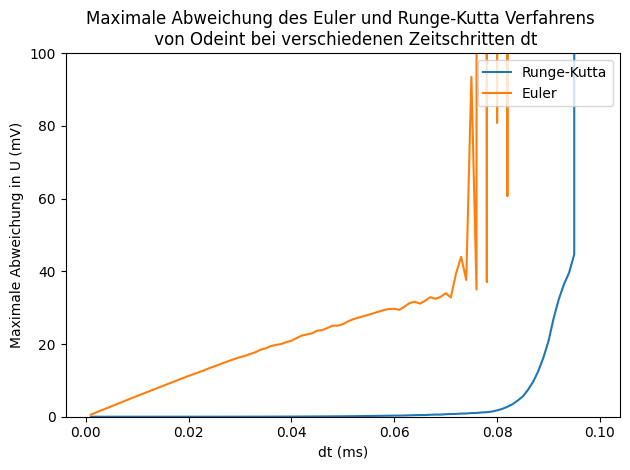

smallest dt value where error with Euler is greater than 5: 0.009000000000000001
smallest dt value where error with Runge-Kutta is greater than 5: 0.085


In [46]:

# plot maximum difference against dt when using Runge-Kutta
dt_list = np.arange(0.001, 0.1, 0.001)
errors_rk = np.zeros(len(dt_list))
errors_euler = np.zeros(len(dt_list))

# we will handle FloatingPointErrors from overflow and underflow
np.seterr(over="raise", under="raise")

for i, dt in enumerate(dt_list):
    _, U_odeint, _, _, _ = HHSimulationOdeint(hh_model, time_period, dt, I_ext).run()

    try: 
        _, U_euler, _, _, _ = HHSimulationEuler(hh_model, time_period, dt, I_ext).run()
        max_difference_euler = max(np.abs(U_euler - U_odeint))
        errors_euler[i] = max_difference_euler
    except FloatingPointError as err:
        print(f"{err} with Euler at {dt=} ms")
        errors_euler[i] = np.finfo(np.float32).max # if there is an underflow or overflow we set a large value as error
    
    try:
        _, U_rk, _, _, _ = HHSimulationClassicalRungeKutta(hh_model, time_period, dt, I_ext).run()
        max_difference_rk = max(np.abs(U_rk - U_odeint))
        errors_rk[i] = max_difference_rk
    except FloatingPointError as err:
        print(f"{err} with Runge-Kutta at {dt=} ms")
        errors_rk[i] = np.finfo(np.float32).max

plt.plot(dt_list, errors_rk, label="Runge-Kutta")
plt.plot(dt_list, errors_euler, label="Euler")

plt.title("Maximale Abweichung des Euler und Runge-Kutta Verfahrens \n von Odeint bei verschiedenen Zeitschritten dt")
plt.xlabel("dt (ms)")
plt.ylabel("Maximale Abweichung in U (mV)")
ax = plt.gca()
ax.set_ylim(0, 100) # set y-axis limit because the large errors make the plot unreadable otherwise
plt.legend()
plt.tight_layout()
plt.show()

print(f"smallest dt value where error with Euler is greater than 5: {dt_list[np.where(errors_euler > 5)[0][0]]}")
print(f"smallest dt value where error with Runge-Kutta is greater than 5: {dt_list[np.where(errors_rk > 5)[0][0]]}")

Es ist zu erkennen, dass beim Euler-Verfahren bereits bei Schrittweiten von 0.009 ms die Abweichung von der Lösung mit odeint größer als 5 mV ist und dann weiter linear bis 0.07 anwächst und dann einen blow-up hat. Die Schrittweite bei der das Runge-Kutta-Verfahren auf eine Abweichung von 5 mV kommt, ist mit 0,085 ms fast zehn Mal so groß. Bei Schrittweiten von 0,085 ms ist Odeint aber immernoch mehr als doppelt so schnell wie die Runge-Kutta-Methode. Daher wird Odeint von uns als optimale Methode zur Lösung von GDG in den Aufgaben 3) und 4) verwendet.
Die weiteren Resultate dieser Aufgabe sollen aber auf einem von uns geschriebenen Solver basieren. Auf Grund der Genauigkeit wird sich für Runge-Kutta entschieden.

2.c) Der konstante externe Strom, der bisher als 5 mV angenommen wurde, wird jetzt von -5 bis 15 mV in 5 mV-Schritten variiert und der Verlauf des Membranpotentials dargestellt.

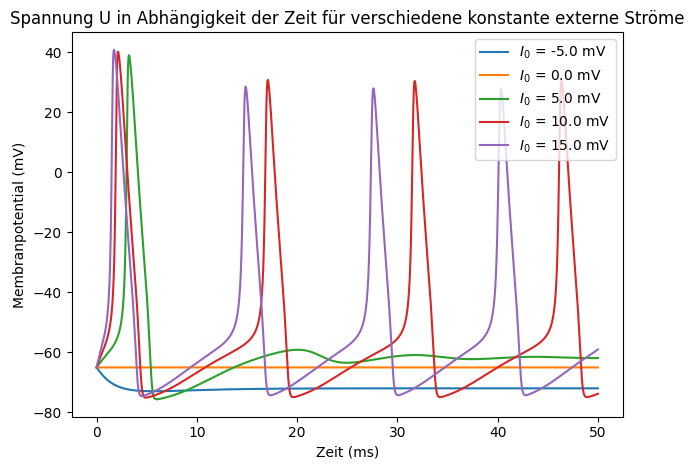

In [47]:
# Visualising U for different constant external currents

I_0_list = np.arange(-5, 15.1, 5)

for I_0 in I_0_list:
    t, U, _, _, _ = HHSimulationClassicalRungeKutta(hh_model, time=50, dt=0.01, I_ext= lambda t: I_0).run()
    plt.plot(t, U, label=f"$I_0$ = {I_0} mV")

plt.title("Spannung U in Abhängigkeit der Zeit für verschiedene konstante externe Ströme")
plt.ylabel("Membranpotential (mV)")
plt.xlabel("Zeit (ms)")
plt.legend(loc = "upper right")
plt.tight_layout()
plt.show()


- $I_0 = -5nA$:   
Das Potential sinkt auf einen niedrigeren Wert und bleibt dort konstant. Es gibt keinen Ausschlag und aufgrund des negativen Stroms wird ein niedrigerer Gleichgewichtszustand angenommen
- $I_0 =  0nA$:   
Die Spannung bleibt konstant bei -65 mV , da bereits im Gleichgewichtszustand der Spannung angefangen wurde.
- $I_0 =  5nA$:   
Es gibt einen einzigen Ausschlag, danach pendelt sich die Spannung ein und ein höherer Gleichgewichtszustand wird angenommen.
- $I_0 = 10nA$:   
Es entstehen periodische Ausschläge im Gegensatz zu 5nA.
- $I_0 = 15nA$:   
Periodische Ausschläge mit höherer Frequenz.

2.d) Es wird das Runge-Kutta Verfahren erneut ausgeführt. Diesmal aber nicht mit einem konstanten Strom, sondern mit einem Rechteckimpuls von 50 nA zwischen 10 und 11 ms und sonst -5 nA.

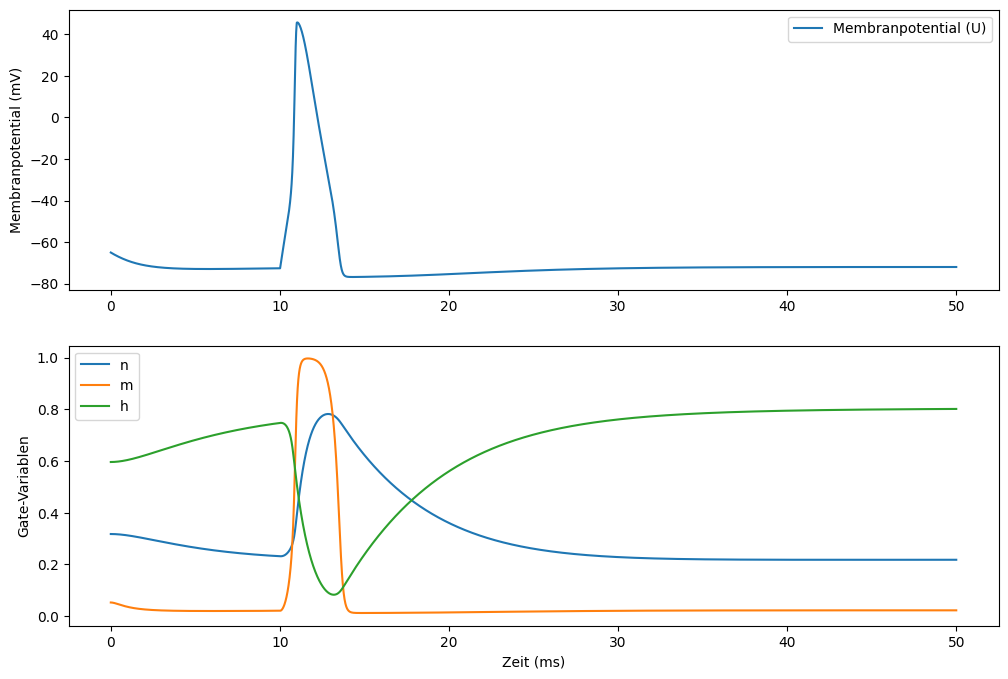

In [48]:
I_0 = -5
I_pulse = 50

def I_ext_pulse(t):
    return I_pulse if 10 < t < 11 else I_0

rk_sim_with_pulse = HHSimulationClassicalRungeKutta(hh_model, time=50, dt=0.01, I_ext=I_ext_pulse)
rk_sim_with_pulse.run()
rk_sim_with_pulse.plot()

Der Rechteckimpuls reicht aus um einen Spannungsausschlag zu generieren.